In [78]:
# Import packages
import spacy
import numpy as np
from spacy import displacy
import pickle as pk
from os import getcwd
import pandas as pd
import json
import nltk
from nltk import word_tokenize, pos_tag, pos_tag_sents
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1.Data preparation
2.Extract aspect terms
3.Sentiment analysis for each aspect

In [79]:
# replace the file path with one appropriate for your drive
data= pd.read_csv('/content/airline_sentiment.csv')
#Virgin America
data_va=data[data["airline"] == 'Virgin America']
data_us=data[data["airline"] == 'US Airways']
data_un=data[data["airline"] == 'United']
data_sw=data[data["airline"] == 'Southwest']
data_de=data[data["airline"] == 'Delta']
data_am=data[data["airline"] == 'American']
data_us.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
8966,681460007,False,finalized,3,2/25/15 3:52,negative,0.6292,Flight Booking Problems,0.3146,US Airways,NaN,jhazelnut,NaN,0,@USAirways is there a better time to call? My...,NaN,2/24/15 11:53,5.703110e+17,NaN,NaN
8967,681460008,False,finalized,3,2/25/15 3:44,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,GAKotsch,NaN,0,@USAirways and when will one of these agents b...,NaN,2/24/15 11:51,5.703100e+17,NaN,Atlantic Time (Canada)
8968,681460009,False,finalized,3,2/25/15 6:40,neutral,1.0000,NaN,NaN,US Airways,NaN,DebbiMcGinnis,NaN,0,@USAirways is a DM possible if you aren't foll...,NaN,2/24/15 11:48,5.703090e+17,Missourah,Hawaii
8969,681460010,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,US Airways,NaN,AshleyKAtherton,NaN,0,@USAirways Fortunately you have staff like Lyn...,NaN,2/24/15 11:47,5.703090e+17,NaN,Central Time (US & Canada)
8970,681460011,False,finalized,3,2/25/15 8:02,negative,1.0000,Customer Service Issue,0.6452,US Airways,NaN,retardedlarry,NaN,0,@USAirways just hung up on me again. Another ...,NaN,2/24/15 11:46,5.703090e+17,NaN,NaN


In [80]:
# Colab environment already has nltk
!pip install nltk

In [81]:
# -*- coding: utf-8 -*-
"""
TA Workshop : Text preparation step by step
"""

import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

In [82]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [83]:
# Preprocessing

import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
mystopwords=stopwords.words("english") + ['usairway','southwestair','usairways', 'americanair', 'get', 'make', 'take','employee','worker','hand','virginamerica','flight',"n't",'http','US Airways','United','Southwest','Delta','American']
WNlemma = nltk.WordNetLemmatizer()
snowball = nltk.SnowballStemmer('english')

snowball = nltk.SnowballStemmer('english')

def pre_process(text):
    tokens = nltk.word_tokenize(text)
    tokens_pos = pos_tag(tokens)
    tokens =[]
    #Nouns
    for w, pos in tokens_pos:
        if pos[0] in ('N', 'V', 'J', 'R'):
            if pos in ('NN','NNPS','NNP','NNS'):
                tokens.append(WNlemma.lemmatize(w.lower(), pos = pos[0].lower()))
            elif pos in ('JJR', 'JJS'):
                tokens.append(WNlemma.lemmatize(w.lower(), pos = 'a'))
            else: 
                tokens.append(w.lower())
    #tokens=[ WNlemma.lemmatize(t.lower()) for t in tokens]
    tokens = [ snowball.stem(t) for t in tokens ]
    tokens=[ t for t in tokens if t not in mystopwords]
    tokens = [ t for t in tokens if len(t) >= 3 ]
    return(tokens)


text = data.text
toks = text.apply(pre_process)

In [84]:
occup_freq = []
for i in range(len(toks)):
    occup = []
    for word in toks[i]:
        occup.append(word)
        occup_freq.extend(list(set(occup)))
print(occup_freq)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [59]:
fd_grain = FreqDist(occup_freq)

In [60]:
fd_grain.most_common(30)

[('unit', 34736),
 ('jetblu', 17621),
 ('thank', 7771),
 ('cancel', 6146),
 ('hour', 5820),
 ('delay', 5236),
 ('custom', 5150),
 ('servic', 4965),
 ('time', 4475),
 ('help', 4007),
 ('call', 3953),
 ('wait', 3938),
 ('bag', 3816),
 ('tri', 3794),
 ('amp', 3764),
 ('need', 3754),
 ('hold', 3703),
 ('plane', 3623),
 ('fli', 3433),
 ('still', 3043),
 ('gate', 2992),
 ('book', 2958),
 ('got', 2941),
 ('flightl', 2793),
 ('pleas', 2788),
 ('day', 2592),
 ('airlin', 2579),
 ('agent', 2526),
 ('back', 2408),
 ('check', 2397)]

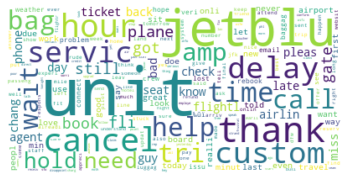

In [61]:
#Approach:By finding frequent nouns and noun phrases
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc_grain = WordCloud(background_color="white").generate_from_frequencies(fd_grain)
plt.imshow(wc_grain, interpolation='bilinear')
plt.axis("off")
plt.show()


In [62]:
#Not much clear on how to select aspect terms and design the mappign table with frquency count
#Number of Words One of the most basic features we can extract is the number of words in each lyrics. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

In [63]:
data['word_count'] = data['text'].apply(lambda x: len(str(x).split(" ")))
data[['text','word_count']].head()

,text,word_count
0,@VirginAmerica What @dhepburn said.,4
1,@VirginAmerica plus you've added commercials t...,9
2,@VirginAmerica I didn't today... Must mean I n...,12
3,@VirginAmerica it's really aggressive to blast...,17
4,@VirginAmerica and it's a really big bad thing...,10


In [64]:
def get_top_n_words(corpus, n=None): 
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])

to 8652
the 6060
you 4400
united 4164
for 3998
flight 3938
on 3815
and 3733
my 3287
usairways 3053
americanair 2964
is 2830
in 2585
southwestair 2461
it 2408
jetblue 2394
of 2121
me 1920
your 1743
that 1733


In [65]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data['text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])

http co 1155
thank you 566
customer service 562
on the 548
on hold 517
cancelled flightled 508
my flight 482
to get 482
for the 455
thanks for 395
to be 369
in the 365
to the 328
can you 315
you guys 311
trying to 307
this is 287
need to 280
out of 267
late flight 249


In [66]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data['text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])

customer service 562
cancelled flightled 508
late flight 249
cancelled flighted 226
flight cancelled 208
late flightr 157
booking problems 145
cancelled flight 145
jetblue fleet 145
fleet fleek 145
fleek http 143
united thanks 136
united flight 132
americanair flight 121
usairways americanair 113
ûï jetblue 108
flight delayed 107
americanair thanks 105
usairways flight 103
jetblue thanks 99


In [67]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(data['text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])

on hold for 237
been on hold 167
thank you for 145
jetblue our fleet 145
fleet on fleek 145
thanks for the 144
our fleet on 144
on fleek http 143
fleek http co 143
was cancelled flightled 106
on the phone 95
flight booking problems 91
ûï jetblue our 91
on the plane 81
_ùª _ùª _ùª 81
can you help 79
your customer service 78
united thank you 77
ve been on 72
over an hour 70


In [ ]:
#texts = toks.tolist()
#tagged_texts = pos_tag_sents(map(word_tokenize, texts))
#tagged_texts

In [ ]:
#top_N = 10
#if not necessary all lower
#a = data['text'].str.lower().str.cat(sep=' ')
#words = nltk.tokenize.word_tokenize(a)
#word_dist = nltk.FreqDist(words)
#print (word_dist)


#rslt = pd.DataFrame(word_dist.most_common(top_N),
#                    columns=['Word', 'Frequency'])
#print(rslt)


In [69]:
#!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [97]:
import spacy
import re
from tqdm import tqdm


In [98]:
competitors = ['Chevy','chevy','Ford','ford','Nissan','nissan','Honda','honda','Chevrolet','chevrolet','Volkswagen','volkswagen','benz','Benz','Mercedes','mercedes','subaru','Subaru','VW']

In [99]:
aspect_terms = []
comp_terms = []
easpect_terms = []
ecomp_terms = []
enemy = []

def get_aspect_adj(data):
    for x in tqdm(range(len(data['text']))):
        amod_pairs = []
        advmod_pairs = []
        compound_pairs = []
        xcomp_pairs = []
        neg_pairs = []
        eamod_pairs = []
        eadvmod_pairs = []
        ecompound_pairs = []
        eneg_pairs = []
        excomp_pairs = []
        enemlist = []
        if len(str(data['text'][x])) != 0:
            lines = str(data['text'][x]).replace('*',' ').replace('-',' ').replace('so ',' ').replace('be ',' ').replace('are ',' ').replace('just ',' ').replace('get ','').replace('were ',' ').replace('When ','').replace('when ','').replace('again ',' ').replace('where ','').replace('how ',' ').replace('has ',' ').replace('Here ',' ').replace('here ',' ').replace('now ',' ').replace('see ',' ').replace('why ',' ').split('.')       
            for line in lines:
                enem_list = []
                for eny in competitors:
                    enem = re.search(eny,line)
                    if enem is not None:
                        enem_list.append(enem.group())
                if len(enem_list)==0:
                    doc = nlp(line)
                    str1=''
                    str2=''
                    for token in doc:
                        if token.pos_ is 'NOUN':
                            for j in token.lefts:
                                if j.dep_ == 'compound':
                                    compound_pairs.append((j.text+' '+token.text,token.text))
                                if j.dep_ is 'amod' and j.pos_ is 'ADJ': #primary condition
                                    str1 = j.text+' '+token.text
                                    amod_pairs.append(j.text+' '+token.text)
                                    for k in j.lefts:
                                        if k.dep_ is 'advmod': #secondary condition to get adjective of adjectives
                                            str2 = k.text+' '+j.text+' '+token.text
                                            amod_pairs.append(k.text+' '+j.text+' '+token.text)
                                    mtch = re.search(re.escape(str1),re.escape(str2))
                                    if mtch is not None:
                                        amod_pairs.remove(str1)
                        if token.pos_ is 'VERB':
                            for j in token.lefts:
                                if j.dep_ is 'advmod' and j.pos_ is 'ADV':
                                    advmod_pairs.append(j.text+' '+token.text)
                                if j.dep_ is 'neg' and j.pos_ is 'ADV':
                                    neg_pairs.append(j.text+' '+token.text)
                            for j in token.rights:
                                if j.dep_ is 'advmod'and j.pos_ is 'ADV':
                                    advmod_pairs.append(token.text+' '+j.text)
                        if token.pos_ is 'ADJ':
                            for j,h in zip(token.rights,token.lefts):
                                if j.dep_ is 'xcomp' and h.dep_ is not 'neg':
                                    for k in j.lefts:
                                        if k.dep_ is 'aux':
                                            xcomp_pairs.append(token.text+' '+k.text+' '+j.text)
                                elif j.dep_ is 'xcomp' and h.dep_ is 'neg':
                                    if k.dep_ is 'aux':
                                            neg_pairs.append(h.text +' '+token.text+' '+k.text+' '+j.text)

                else:
                    enemlist.append(enem_list)
                    doc = nlp(line)
                    str1=''
                    str2=''
                    for token in doc:
                        if token.pos_ is 'NOUN':
                            for j in token.lefts:
                                if j.dep_ == 'compound':
                                    ecompound_pairs.append((j.text+' '+token.text,token.text))
                                if j.dep_ is 'amod' and j.pos_ is 'ADJ': #primary condition
                                    str1 = j.text+' '+token.text
                                    eamod_pairs.append(j.text+' '+token.text)
                                    for k in j.lefts:
                                        if k.dep_ is 'advmod': #secondary condition to get adjective of adjectives
                                            str2 = k.text+' '+j.text+' '+token.text
                                            eamod_pairs.append(k.text+' '+j.text+' '+token.text)
                                    mtch = re.search(re.escape(str1),re.escape(str2))
                                    if mtch is not None:
                                        eamod_pairs.remove(str1)
                        if token.pos_ is 'VERB':
                            for j in token.lefts:
                                if j.dep_ is 'advmod' and j.pos_ is 'ADV':
                                    eadvmod_pairs.append(j.text+' '+token.text)
                                if j.dep_ is 'neg' and j.pos_ is 'ADV':
                                    eneg_pairs.append(j.text+' '+token.text)
                            for j in token.rights:
                                if j.dep_ is 'advmod'and j.pos_ is 'ADV':
                                    eadvmod_pairs.append(token.text+' '+j.text)
                        if token.pos_ is 'ADJ':
                            for j in token.rights:
                                if j.dep_ is 'xcomp':
                                    for k in j.lefts:
                                        if k.dep_ is 'aux':
                                            excomp_pairs.append(token.text+' '+k.text+' '+j.text)
            pairs = list(set(amod_pairs+advmod_pairs+neg_pairs+xcomp_pairs))
            epairs = list(set(eamod_pairs+eadvmod_pairs+eneg_pairs+excomp_pairs))
            for i in range(len(pairs)):
                if len(compound_pairs)!=0:
                    for comp in compound_pairs:
                        mtch = re.search(re.escape(comp[1]),re.escape(pairs[i]))
                        if mtch is not None:
                            pairs[i] = pairs[i].replace(mtch.group(),comp[0])
            for i in range(len(epairs)):
                if len(ecompound_pairs)!=0:
                    for comp in ecompound_pairs:
                        mtch = re.search(re.escape(comp[1]),re.escape(epairs[i]))
                        if mtch is not None:
                            epairs[i] = epairs[i].replace(mtch.group(),comp[0])

        aspect_terms.append(pairs)
        comp_terms.append(compound_pairs)
        easpect_terms.append(epairs)
        ecomp_terms.append(ecompound_pairs)
        enemy.append(enemlist)
    data['compound_nouns'] = comp_terms
    data['aspect_keywords'] = aspect_terms
    data['competition'] = enemy
    data['competition_comp_nouns'] = ecomp_terms
    data['competition_aspects'] = easpect_terms
    return data

In [100]:
data1 = get_aspect_adj(data)

100%|██████████| 14640/14640 [04:35<00:00, 53.23it/s]


In [105]:
data1['aspect_keywords']=data1['aspect_keywords'].apply(str)

In [123]:
# Preprocessing

import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
mystopwords=stopwords.words("english") + ['usairway','southwestair','usairways', 'americanair', 'get', 'make', 'take','employee','worker','hand','virginamerica','flight',"n't",'http','US Airways','United','Southwest','Delta','American']
WNlemma = nltk.WordNetLemmatizer()
snowball = nltk.SnowballStemmer('english')

snowball = nltk.SnowballStemmer('english')

def pre_process(text):
    tokens = nltk.word_tokenize(text)
    tokens_pos = pos_tag(tokens)
    tokens =[]
    #Nouns
    for w, pos in tokens_pos:
        if pos[0] in ('N', 'V', 'J', 'R'):
            if pos in ('NN','NNPS','NNP','NNS', 'RBR', 'RBS', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'):
                tokens.append(WNlemma.lemmatize(w.lower(), pos = pos[0].lower()))
            elif pos in ('JJR', 'JJS'):
                tokens.append(WNlemma.lemmatize(w.lower(), pos = 'a'))
            else: 
                tokens.append(w.lower())
    tokens=[ WNlemma.lemmatize(t.lower()) for t in tokens]
    #tokens = [ snowball.stem(t) for t in tokens ]
    tokens=[ t for t in tokens if t not in mystopwords]
    tokens = [ t for t in tokens if len(t) >= 3 ]
    return(tokens)


text = data1.aspect_keywords
toks = text.apply(pre_process)

In [124]:
occup_freq = []
for i in range(len(toks)):
    occup = []
    for word in toks[i]:
        occup.append(word)
        occup_freq.extend(list(set(occup)))
print(occup_freq)

["'obnoxious", "'obnoxious", 'entertainment', "'obnoxious", 'entertainment', 'recourse', "'really", 'big', "'really", 'big', "'really", 'thing', 'big', "'really", 'thing', 'big', "'really", 'thing', "'only", "'only", 'thing', "'only", 'thing', "'seriously", "'only", 'thing', "'seriously", "'only", 'pay', 'thing', 'away', 'opportunity', "'really", 'opportunity', 'miss', "'really", 'opportunity', "'arrived", "'arrived", 'early', "'second", 'cause', "'second", 'cause', "'leading", "'second", 'cause', "'leading", "'second", 'iconography', 'trip', 'trip', 'trip', 'deal', 'trip', 'deal', 'yet', 'trip', "'already", 'deal', 'yet', 'trip', 'yet', 'think', 'deal', "'already", "'take", "'take", 'away', "'flying", "'take", 'away', "'flying", "'take", "'fabulous", 'away', "'flying", "'take", 'sky', "'fabulous", 'away', "'flying", "'take", "'seductive", 'sky', "'fabulous", 'away', "'flying", "'take", "'seductive", 'sky', "'fabulous", 'away', 'cross', 'cross', 'country', 'cross', 'thing', 'country', 

In [125]:
fd_grain = FreqDist(occup_freq)

In [126]:
fd_grain.most_common(30)

[('united', 707),
 ('customer', 680),
 ('service', 631),
 ('time', 495),
 ('back', 443),
 ("'only", 374),
 ('airline', 323),
 ('unite', 323),
 ("'really", 322),
 ('experience', 303),
 ('day', 273),
 ("'best", 253),
 ('fly', 247),
 ('thanks', 216),
 ('wait', 204),
 ('seat', 202),
 ('delay', 201),
 ('home', 196),
 ('class', 186),
 ("'terrible", 184),
 ("'finally", 178),
 ("'even", 167),
 ("'flying", 156),
 ("'mechanical", 156),
 ('gate', 155),
 ('trip', 154),
 ('plane', 152),
 ('night', 148),
 ("'different", 148),
 ('agent', 146)]

In [127]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data1['aspect_keywords'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])

customer service 200
united thanks 95
last night 58
still waiting 58
first class 49
fly again 47
next flight 47
worst airline 45
first time 40
never fly 40
united flight 37
worst customer 35
earlier flight 34
bad weather 33
great job 32
other airlines 30
looking forward 29
again never 29
great flight 28
new flight 28


In [128]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data1['aspect_keywords'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])

customer service 200
united thanks 95
worst airline 46
united flight 38
fly fly 35
worst customer 35
earlier flight 34
bad weather 33
great job 32
looking forward 29
great flight 28
new flight 28
mechanical issues 27
poor customer 24
worst experience 23
quick response 20
great service 20
direct flight 19
round trip 19
finally got 19


In [129]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(data1['aspect_keywords'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])

worst customer service 32
poor customer service 23
never fly fly 22
fly fly again 22
terrible customer service 18
great customer service 16
flying again never 15
again never flying 15
horrible customer service 8
united customer service 7
amazing customer service 7
second cause leading 6
cause leading cause 6
fly again never 6
again never fly 6
customer service experience 6
excellent customer service 6
good work folks 5
awful customer service 5
bad customer service 5


In [130]:
#Mapping aspects
# aspect categories
# From Frequency approach
aspect = {"Flight": ["flight delayed","was cancelled flightled","late flightr","cancelled flightled","flight delayed","flight cancelled","cancelled flighted","great flight"],
          "service": ["customer service","worst customer service","poor customer service","terrible customer service","great customer service","horrible customer service","amazing customer service","excellent customer service","awful customer service","bad customer service"]}
# Let's also use a category 'overall' to cover everything else    

# Helper function for categorising aspects:
# Here the input is output from Spacy
def aspectCat(sentence):
    category=[]
    for tok in sentence:
        tok = tok.text.lower()
        for key, val in aspect.items():
            if tok in val: category.append(key)
    if len(category) == 0 : category.append("overall")
    return category

In [131]:
analyzer = SentimentIntensityAnalyzer()

In [118]:
#Vader returns 4 scores. We take the 'compound' score as overall sentiment for the sentence.
res = analyzer.polarity_scores("The apple is awful.")
res

{'compound': -0.4588, 'neg': 0.5, 'neu': 0.5, 'pos': 0.0}

In [119]:
#!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [120]:
result_sents =[] 

def getSentiment(span):
    res = analyzer.polarity_scores(span.text)
    senti = np.round(res['compound'],2)
    return (senti)

ex=93
doc = nlp(data["text"][ex])
for idx, sentence in enumerate(doc.sents):
    #print (sentence)
    res = getSentiment(sentence)

    try:
        cat = aspectCat(sentence)      
        result_sents.append({"scores":res, "text":sentence, "category":cat})
    except IndexError:
        # there are no specific aspects talked about. Just in general
        result_sents.append({"scores":res, "text":sentence, "category":"overall"})

for s in result_sents:
  print(s)

{'scores': 0.0, 'text': @VirginAmerica just landed in LAX, an hour after I should of been here., 'category': ['overall']}
{'scores': -0.59, 'text': Your no Late Flight bag check is not business travel friendly #nomorevirgin, 'category': ['overall']}


In [121]:
reviews = {}
for i in range(len(data["text"])):
    doc = nlp(data["text"][i])
    review_sents =[] 
    for idx, sentence in enumerate(doc.sents):
        #print (sentence)
        res = getSentiment(sentence)

        try:
            cat = aspectCat(sentence)      
            review_sents.append({"scores":res, "text":sentence.text, "category":cat})
        except IndexError:
            review_sents.append({"scores":res, "text":sentence.text, "category":"overall"})
    reviews[i]=review_sents

# summarise all reviews
summary_scores = {"overall":[], "Flight":[], "service":[]}
# count total no of 
for item in reviews.items():
    for ResultList in item[1]:
        score = ResultList["scores"]
        for CatList in ResultList["category"]:
            summary_scores[CatList].append(score)

# for each category, summarize how many reviews are positive, negative respectively
print (summary_scores)
for key, val in summary_scores.items():
    #avg = round(np.mean(val),2)
    pos = np.sum(np.array(val) >= 0, axis=0)
    neg = np.sum(np.array(val) < 0, axis=0)
    summary_scores[key]={"pos":pos,"neg": neg, "Total": pos + neg}
#summary_scores["total no of reviews"]=len(reviews)

df_summary = pd.DataFrame(summary_scores)
df_summary=df_summary.transpose()

{'overall': [0.0, 0.0, 0.0, 0.0, 0.0, -0.27, 0.0, -0.58, -0.03, -0.58, 0.4, 0.0, 0.46, 0.0, 0.08, 0.0, 0.0, 0.27, 0.56, 0.59, 0.44, -0.86, 0.49, 0.8, 0.0, 0.66, 0.0, 0.0, 0.57, -0.42, 0.49, -0.45, 0.4, -0.66, 0.0, 0.0, 0.0, 0.46, 0.0, 0.66, 0.54, 0.08, 0.0, 0.0, 0.64, 0.0, 0.78, 0.44, -0.3, -0.34, 0.48, 0.0, 0.0, 0.56, 0.0, 0.0, -0.3, 0.0, 0.0, 0.0, 0.0, -0.54, -0.15, 0.34, 0.0, 0.59, 0.0, 0.0, -0.05, 0.0, 0.0, 0.0, 0.17, 0.0, -0.4, 0.0, 0.4, 0.0, -0.29, -0.44, 0.0, 0.66, 0.0, 0.0, 0.42, 0.0, 0.0, 0.0, 0.0, 0.0, 0.67, 0.61, 0.0, 0.0, 0.67, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.4, -0.15, 0.4, 0.83, 0.0, 0.0, 0.0, 0.0, 0.0, 0.54, 0.41, 0.0, 0.59, 0.0, 0.36, 0.44, 0.0, 0.0, 0.0, 0.0, 0.0, 0.44, 0.6, -0.45, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.42, 0.0, 0.0, 0.0, 0.0, 0.62, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.08, 0.0, 0.0, 0.37, 0.0, 0.0, -0.15, 0.64, 0.0, 0.0, 0.0, 0.32, 0.0, -0.03, 0.0, 0.0, 0.0, 0.94, 0.0, -0.13, 0.0, 0.38, 0.0, 0.0, 0.0, 0.08, 0.0, 0.0, 0.37, -0.44, 0.0, 0.88

In [132]:
df_summary

,pos,neg,Total
overall,29576,7352,36928
Flight,0,0,0
service,0,0,0


In [133]:
#add two new columns into the table
df_summary["category"] = df_summary.index
#represent overall sentiment for the categary based on num of pos/neg
df_summary["sentiment"] = np.round((df_summary["pos"]-df_summary["neg"])/(df_summary["neg"]+df_summary["pos"]),2)


In [134]:
df_summary

,pos,neg,Total,category,sentiment
overall,29576,7352,36928,overall,0.6
Flight,0,0,0,Flight,NaN
service,0,0,0,service,NaN


In [135]:
!pip install squarify
import squarify
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

ZeroDivisionError: ignored

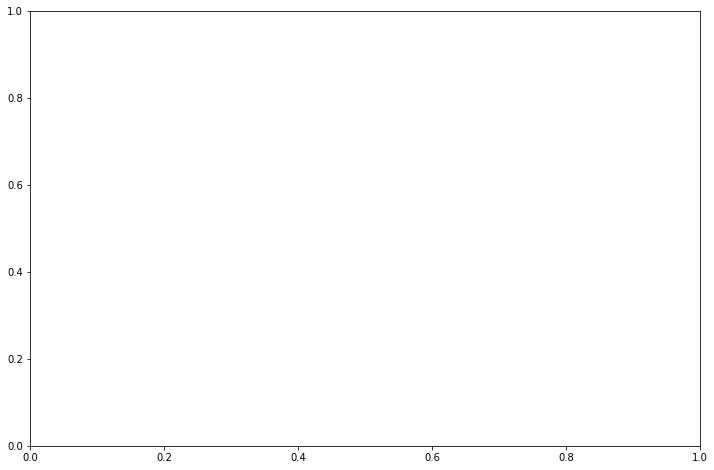

In [136]:
#Create a visualization
norm = matplotlib.colors.Normalize(vmin=min(df_summary.sentiment), vmax=max(df_summary.sentiment))
colors = [matplotlib.cm.Reds(norm(value)) for value in df_summary.sentiment]

fig = plt.gcf()
fig.set_size_inches(12, 8)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
# Also used color intensity to reflect the sentiment value. 
squarify.plot(label=df_summary.category,sizes=df_summary.Total, value = df_summary.sentiment,color = colors, alpha=.5, pad =True)
plt.title("Sentiment Heat Map of Restaurant Aspects",fontsize=20,fontweight="bold")

In [ ]:
***************************************************______________________________________________________________________________******************************************************

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


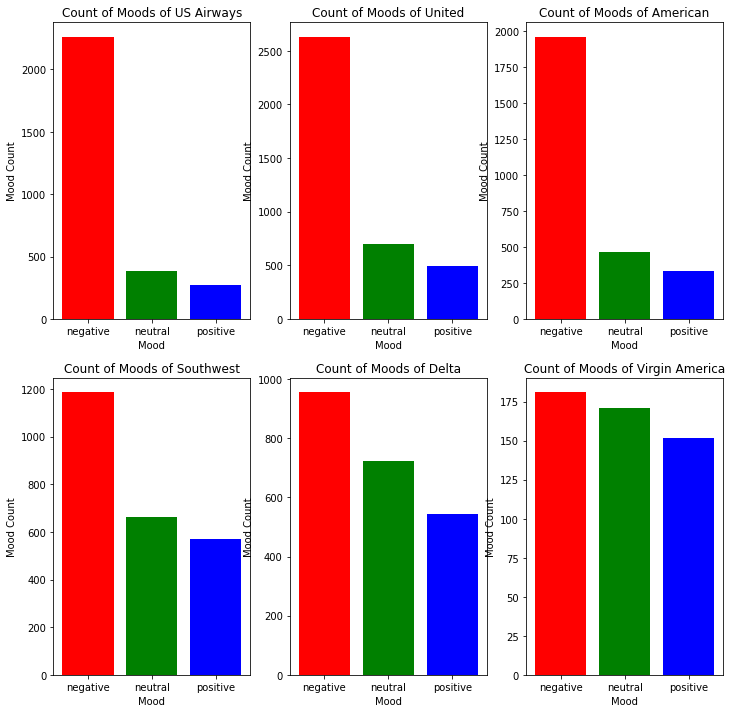

In [ ]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

In [ ]:
from wordcloud import WordCloud,STOPWORDS

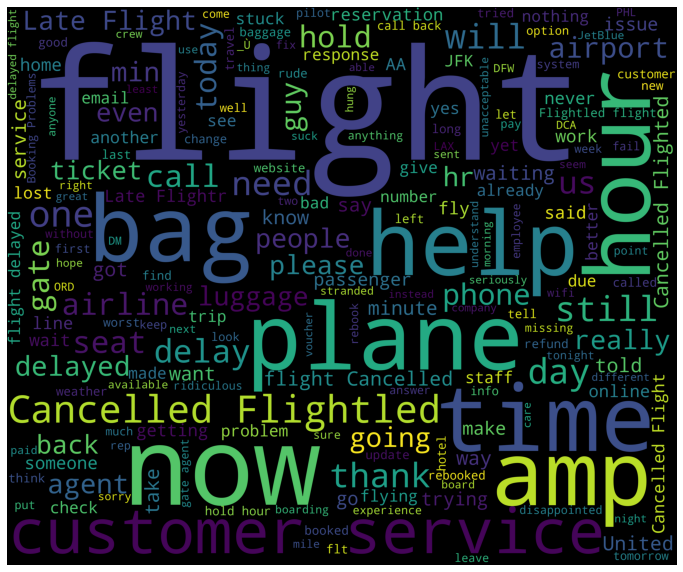

In [ ]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

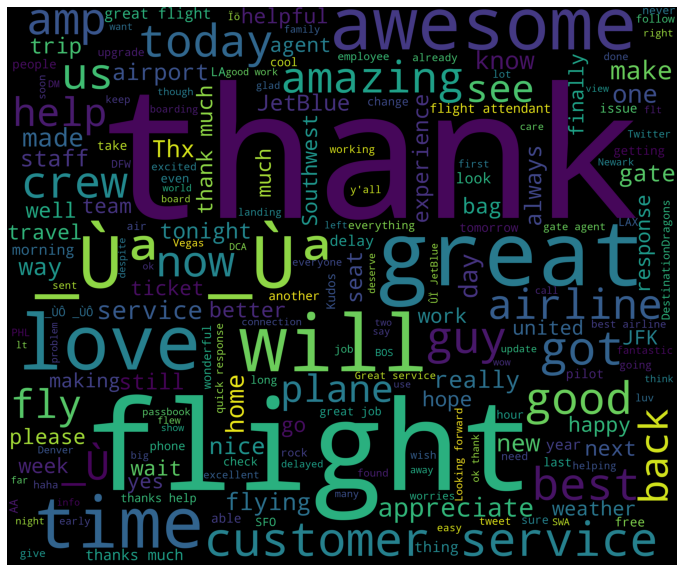

In [ ]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# # aspect categories
# # From Frequency approach
# aspect = {"food": ["xiao long bao", "noodles", "food", "dumplings", "pork", "flavour", "chili", 
#                    "dishes", "lunch", "bun", "shrimp", "dimsum", "rice", "chicken"],
#         "service" : ["staff", "wait", "water", "queue" ],
#         "price" : ["price", "cost"]   }
# # Let's also use a category 'overall' to cover everything else    

# # Helper function for categorising aspects:
# # Here the input is output from Spacy
# def aspectCat(sentence):
#     category=[]
#     for tok in sentence:
#         tok = tok.text.lower()
#         for key, val in aspect.items():
#             if tok in val: category.append(key)
#     if len(category) == 0 : category.append("overall")
#     return category

In [ ]:
# Calculate highest frequency words in positive tweets
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        
print(freq(cleaned_word))

Frequency of to is : 923
Frequency of the is : 924
Frequency of time is : 59
Frequency of I is : 574
Frequency of fly is : 54
Frequency of this is : 143
Frequency of :) is : 96
Frequency of it is : 166
Frequency of was is : 226
Frequency of and is : 416
Frequency of an is : 74
Frequency of good is : 75
Frequency of so is : 163
Frequency of much is : 54
Frequency of is is : 219
Frequency of a is : 501
Frequency of great is : 144
Frequency of my is : 320
Frequency of &amp; is : 77
Frequency of on is : 327
Frequency of I'm is : 67
Frequency of flying is : 59
Frequency of your is : 212
Frequency of all is : 92
Frequency of from is : 124
Frequency of Thanks! is : 69
Frequency of for is : 658
Frequency of flight is : 263
Frequency of but is : 91
Frequency of you is : 509
Frequency of would is : 56
Frequency of be is : 135
Frequency of with is : 195
Frequency of you. is : 77
Frequency of love is : 85
Frequency of You is : 62
Frequency of are is : 120
Frequency of of is : 236
Frequency of that

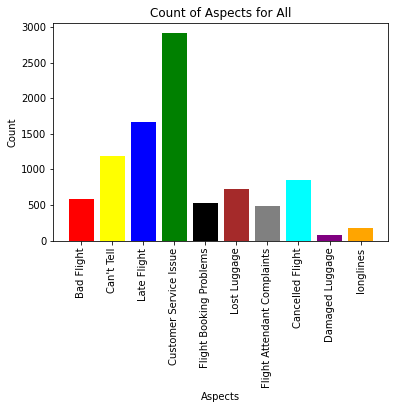

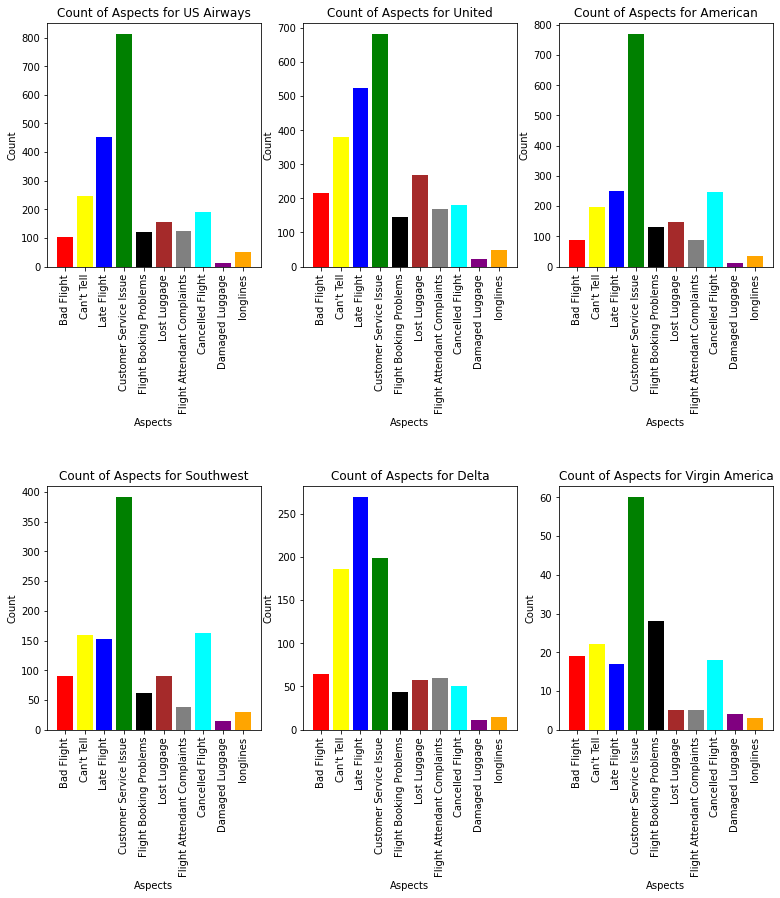

In [ ]:
#get the number of negative reasons
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Aspects')
    plt.title('Count of Aspects for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)